# 14: 优化与寻根

<a href="https://nb.bohrium.dp.tech/detail/4641466990?utm_source=ck-github" target="_blank"><img src="https://cdn.dp.tech/bohrium/web/static/images/open-in-bohrium.svg" alt="Open In Bohrium"/></a>

优化是将某个事物改进到无法再合理改进的程度的过程。这通常涉及最大化有益属性和/或最小化不良属性，因此寻找最大值和最小值是常见的优化目标。虽然你可能没有直接使用过优化，但你几乎肯定在更大的应用程序或任务中使用过它，例如分子的能量最小化、回归分析或许多机器学习算法。

在优化任务中，我们常常会寻找给定数学函数的最大值或最小值。比如，如果我们试图最小化一个函数$f(a,b)$，我们的目标是找到输入变量$a$和$b$的值，以使得从函数$f$生成的输出最小。一种方法是手动尝试不同的输入值，直到得到可能的最小输出，但这种繁琐且耗时的任务最好交给计算机。`scipy.optimize`模块包含了许多用于优化数学函数的工具。本章的目标是介绍`scipy.optimize`模块并将其应用于化学应用。本章不涉及优化的更深层理论，如特定算法。对于那些对优化的深层理论感兴趣的人，请参阅进一步阅读部分。

在开始之前，我们首先需要解决如何衡量什么是“最好”的问题？为此，我们使用一个*成本函数*，也称为*目标函数*或*标准*，这是一个数学函数，它采用特征并返回一个“优势”的度量值。如果我们是一个试图最大化利润的公司，目标函数可能是一个计算我们净利润的数学方程。分子构象的优化涉及到能量的最小化，因此这里的目标函数是根据诸如键角和键长等属性计算分子能量的函数。在下面的示例中，每个`scipy.optimize`函数都以Python函数形式的目标函数作为其第一个参数。

~~~python
scipy.optimize.func(obj_func)
~~~

本章中的示例假设从NumPy, SciPy, pandas和matplotlib导入了以下内容。

In [2]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt

## 14.1 最小化

我们将首先研究的任务是最小化，为此，`scipy.optimize`有两个相关函数`scipy.optimize.minimize()`和`scipy.optimize.minimize_scalar()`。这两个函数都可以最小化所提供的函数，但它们之间的区别在于目标函数接受的自变量个数。只有一个自变量的函数，$f(a)$，被称为*单变量*函数，而接受多个自变量的函数，$f(a,b,...)$，被称为*多变量*函数。`minimize()`函数可以用来最小化多变量和单变量函数，而`minimize_scalar()`函数只能接受单变量目标函数。

### 14.1.1 单变量最小化

如果我们试图最小化一个只有一个自变量的函数，那么`scipy.optimize.minimize_scalar()`可能是个不错的选择。作为一个简单的例子，我们将使用下面的Lennard-Jones方程找到两个氙原子之间的最小能量半径，该方程描述了两个原子之间的距离$r$与势能的关系。在这个例子中，$\sigma$ = 4.10埃（angstroms）和 $\epsilon$ = 1.77千焦/摩尔（kJ/mol）。

$$ PE = 4 \epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right] $$

由于Lennard-Jones能量方程描述的能量是我们试图最小化的对象，这就是我们的目标函数。我们首先需要将这个方程定义为一个Python函数。

In [3]:
def PE_LJ(r):
    epsilon = 4.10 #kJ/mol
    sigma = 1.77 #angstroms
    PE = 4 * epsilon * ( (sigma/r)**12 - (sigma/r)**6)
    return PE

接下来，我们将把目标函数输入`scipy.optimize.minimize_scalar()`函数中，并添加一些约束。这被称为*约束优化*，通过设置`method='bounded'`和`bounds=`来实现，这是函数在此范围内的值。在这个例子中，我们将$r$的值限制在一个特定的范围内。

~~~python
scipy.optimize.minimize_scalar(func, bounds=(start, stop), method=)
~~~

通常创建边界是可选的，但是如果你大致知道最小值在哪里，或者它不能在哪里，这是非常有帮助的信息。在这个例子中，为$r$提供约束条件是很重要的，以确保`minimize_scalar()`函数不会尝试使用r = 0并产生`ZeroDivisionError`。

```
因为我们在这一章中明确地导入了`optimize`模块，在`scipi.optimize`模块中调用任何函数都不需要包括`scipy`。
```

In [4]:
opt = optimize.minimize_scalar(PE_LJ, bounds=(0.1,100), 
                               method='bounded')
opt

 message: Solution found.
 success: True
  status: 0
     fun: -4.099999999992542
       x: 1.986757378942203
     nit: 21
    nfev: 21

另外，我们可以使用`bracket=(a, b)`参数，其中 *f(b)* < *f(a)*。这个参数与`bounds=`参数的不同之处在于，它并没有告诉函数搜索的区域，而是告诉`minimize_scalar()`函数搜索最小值的*方向*。最小值不需要在*a*和*b*之间，但它只是告诉函数，如果它沿着*a* $\rightarrow$ *b*的方向移动，它将朝着最小值移动。

`bracket=`参数还可以接受三个值，`bracket=(a, b, b)`，其中 $f(a)$ > $f(b)$ < $f(c)$。这对最小化函数更有帮助，但也需要用户对正在最小化的函数有更多的了解。

In [5]:
opt = optimize.minimize_scalar(PE_LJ, bracket=(0.1,100))
opt

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -4.099999999999997
       x: 1.9867578344041286
     nit: 23
    nfev: 26

运行完优化函数后，会返回一个`OptimizeResult`对象。这个对象具有上面列出的一系列属性，但最重要的两个属性是`success`和`x`。`success`属性告诉我们优化函数是否成功地收敛到一个解，而`x`属性是优化后的解。我们可以通过`opt.x`访问解，从而了解到根据Lennard-Jones能量方程得出的最小距离为1.99埃。

In [6]:
opt.x

1.9867578344041286

由于我们的能量函数只是单变量的，我们可以很容易地将函数和我们的最小化解（橙色点）可视化，如下所示。

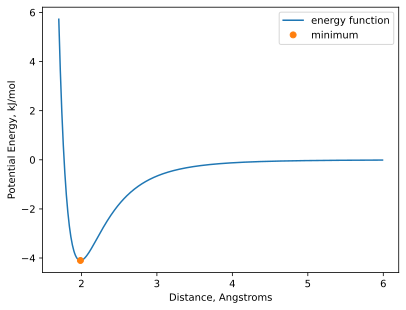

In [7]:
r = np.arange(1.7, 6, 0.01)
PE = PE_LJ(r)
plt.plot(r, PE, label='energy function')
plt.plot(opt.x, PE_LJ(opt.x), 'o', label='minimum')
plt.xlabel('Distance, Angstroms')
plt.ylabel('Potential Energy, kJ/mol')
plt.legend();

```
优化函数可以使用具有随机组件的算法，因此，如果多次运行它们，可能会观察到结果的变化。结果通常只有轻微变化，但有时可能观察到更明显的变化，例如，如果目标函数中存在多个最小值或最大值。
```

````{admonition} 它是如何工作的...
:class: seealso
优化的目标是最小化目标函数，这可以通过多种算法来实现。了解这些算法并不是使用优化的前提，但如果你感到好奇，以下是从10,000英尺的高度看到的景象。尽管有各种各样的算法可供选择，但它们通常几乎是靠试错的方法进行操作。它们从目标函数的初始输入值开始，然后尝试稍微不同的输入值。如果新的输入值减小了目标函数，它们将被接受；如果它们增加了目标函数，它们将被拒绝。这将继续进行多次迭代，找到逐渐减小目标函数的值，直到算法无法进一步最小化目标函数。然后，优化函数将最终输入值作为优化值返回。优化算法可以不同，例如，它们决定下一个尝试的输入值的方式，或者尝试的后续输入值应该有多大的不同。有关优化算法的更多信息，请参阅进一步阅读。
`````

### 14.1.2 最小化用于最大化

SciPy库不包含任何最大化函数，但最大化函数并非真正必要，因为最小化负函数可以提供最大值。例如，下面是氢3s轨道的径向概率函数。为方便起见，使用SymPy库的`sympy.physics`模块将3s径向函数（$\psi$，`psi`）生成为一个Python函数。在此最大化示例中，让我们找到电子最大概率的半径。归一化概率可以通过计算$\psi^2 r^2$获得，其中$r$是距离原子核的距离。

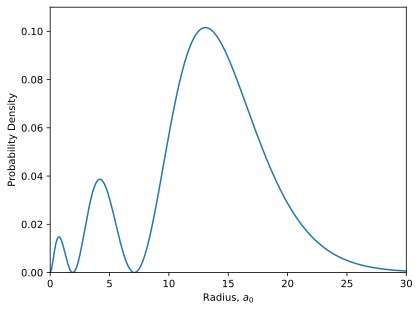

In [8]:
import sympy
from sympy.physics.hydrogen import R_nl
R = sympy.symbols('R')

psi_expr = R_nl(3, 0, R) # generate wave function using SymPy
psi = sympy.lambdify(R, psi_expr, 'numpy') # convert to a Python function

r = np.arange(0,40,0.1)
plt.plot(r, psi(r)**2 * r**2) # r is in bohrs (~0.529 anstroms)
plt.xlim(0,30)
plt.ylim(0,0.11)
plt.margins(x=0, y=0)
plt.xlabel('Radius, $a_0$')
plt.ylabel('Probability Density');

有多种方法可以使函数为负，例如在Python函数定义中包含负号。我们的Python函数已经创建，因此下面我们将使用`lambda`函数使径向概率密度为负（关于lambda函数，请参阅第2.1.4节）。

In [9]:
mx = optimize.minimize_scalar(lambda x: -psi(x)**2 * x**2)
mx

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.014833612579485785
       x: 0.7400370693225894
     nit: 13
    nfev: 16

返回的值是第一个局部最大值，但不是我们正在寻求的全局最大值。为了确保我们获得全局最大值，我们需要为优化函数使用的半径范围添加一个约束。

In [10]:
mx = optimize.minimize_scalar(lambda x: -psi(x)**2 * x**2,
                              bounds=(10,20), method='bounded')
mx

 message: Solution found.
 success: True
  status: 0
     fun: -0.10153431119853075
       x: 13.074031887574048
     nit: 11
    nfev: 11

下面将全局最大值绘制为橙色点。

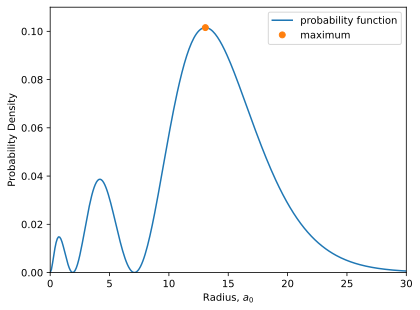

In [11]:
plt.plot(r, psi(r)**2 * r**2, label='probability function')
plt.plot(mx.x, psi(mx.x)**2 * mx.x**2, 'o', label='maximum')
plt.xlim(0,30)
plt.ylim(0,0.11)
plt.xlabel('Radius, $a_0$')
plt.ylabel('Probability Density')
plt.margins(x=0, y=0)
plt.legend();

### 14.1.3 多变量最小化

`scipy.optimize`模块中的关键最小化函数之一是`minimize()`函数，它能够同时最小化多个变量。此函数至少需要两个参数，目标函数和每个值的初始猜测作为列表或元组。

~~~python
scipy.optimize.minimize(obj_func, (guess))
~~~

作为示例，我们将计算下面显示的三个不同同分异构体之间的串联平衡的平衡浓度，假设我们将初始122mmol的异构体A溶液放入并在25℃下达到平衡。这个平衡的两个平衡常数为*K*$_1$=5.0和*K*$_2$=0.80。

$$ A {\stackrel{K_1}{\rightleftharpoons}} B {\stackrel{K_2}{\rightleftharpoons}} C$$

要解决这个问题，我们需要调整三个异构体浓度，我们的变量，使它们尽可能接近由平衡常数设定的平衡比值。

第一步是编写一个目标函数作为Python函数`obj_func()`，量化解的质量。我们正在最小化此函数的值，以生成我们问题的最佳解。我们的目标是使异构体数量尽可能接近平衡比值，一个合理的目标函数将计算我们的异构体比值离平衡的程度。我们解的质量将从提议解和目标平衡常数之间的差的平方来计算，这样，提议解离目标平衡值越远，解的质量评估就越差。

In [12]:
K1, K2 = 5.0, 0.80

def obj_func(guess):
    A, B, C = guess
    
    Q1 = B/A  # reaction quotient
    Q2 = C/B  # reaction quotient
    
    quality = (Q1 - K1)**2 + (Q2 - K2)**2
    
    return quality

接下来，我们为`minimize()`函数提供目标函数和A、B、C数量的初始猜测值。初始猜测值需要是一个单独的集合，如元组、数组或列表。`minimize()`函数的输出再次是一个`OptimizeResult`对象，其`x`属性分别访问A、B、C的最小化数量。

In [13]:
guess = (0.5, 0.25, 0.25)
equ = optimize.minimize(obj_func, guess)
equ

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 9.425991526412144e-14
        x: [ 1.917e-01  9.583e-01  7.667e-01]
      nit: 8
      jac: [-5.538e-06  3.657e-06 -1.149e-07]
 hess_inv: [[ 3.200e-03  1.199e-02  5.102e-03]
            [ 1.199e-02  5.824e-02  2.450e-02]
            [ 5.102e-03  2.450e-02  4.582e-01]]
     nfev: 60
     njev: 15

要访问最小化的值，在这个例子中使用`equ.x`。然后我们可以通过根据计算出的平衡数量计算平衡值来验证结果。

In [14]:
equ.x[1]/equ.x[0]

5.000000300516167

In [15]:
equ.x[2]/equ.x[1]

0.7999999371513814

这两个值与上面列出的$K_1$和$K_2$非常吻合。要解决我们的问题，还有一个步骤。在上述问题中，我们陈述了开始时有122 mmol的异构体A，所以如果我们对A、B和C的数量求和，它们需要等于122。

In [16]:
np.sum(equ.x)

1.9166790954058386

它们的总和不等于122 mmol，所以我们需要将这些数量按比例扩大到总共122 mmol。请注意，调整A、B和C的值不会改变它们之间的比例。

In [17]:
scale_factor = 122 / np.sum(equ.x)
scale_factor * equ.x

array([12.19999972, 61.00000228, 48.79999799])

A、B和C的最终平衡量分别为12.2、61.0和48.8 mmol。

```{warning}
重要的是要认识到，仅仅因为优化函数生成了一个答案，并不意味着它确实是你的问题的正确答案。生成的答案是优化算法在产生最佳结果方面的最大努力，例如，它可能是局部最小值而不是全局最小值。如果有办法验证答案，例如在上面的平衡示例中所做的那样，那么在使用这些信息之前，这是一个谨慎的最后一步。
```

## 14.2 将方程拟合到数据

优化的一个常见应用是将方程拟合到一系列数据点，例如线性回归。虽然线性回归也恰好有一个在第8.3.3节中展示的解析解，但我们将在这里使用优化来解决它。在下图中，回归线（实线橙色）穿过数据点。 *残差* 是回归线和数据点之间的差值（绿色垂直虚线）。线性回归的目标是生成一个最小化这些残差的回归线。

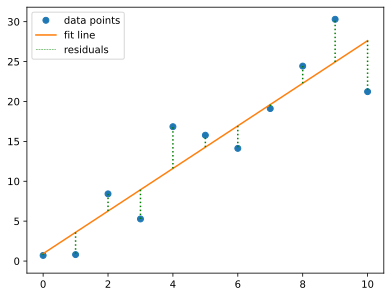

In [18]:
# code cell to generate figure but hidden in book using cell tags

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

rng = np.random.default_rng(seed=18)
x = np.arange(0,11)
y_noisy = 2.2 * x + 2 + 3 * rng.normal(size=11)
a, b = np.polyfit(x, y_noisy, 1)
y = a*x + b

plt.plot(x,y_noisy, 'o', label='data points')
plt.plot(x,y, '-', label='fit line')

for coords in zip(x, y, y_noisy):
    plt.vlines(coords[0], coords[1], coords[2], colors='g', linestyles='dotted')
    
plt.plot(0,0, ls='--', lw=0.5, color='g', label='residuals')
plt.legend()
plt.show()

**图 1** 最佳拟合线（实线橙色）穿过数据点（蓝色）的示例，残差（绿色虚线）显示为数据点和线性回归之间的$y$轴上的差值。

回归中的一个主要问题是如何衡量拟合的质量。原则上，我们可以使用残差的总绝对和（称为*最小绝对偏差*成本或目标函数），但是拟合方程到数据的常用目标函数是 *均方误差（MSE）* 函数。这是方程预测和实际数据点之间的差值平方的平均值，或者换句话说，MSE是拟合线的平均平方残差。下面显示了MSE方程，其中$f_i$是回归线的 *y* 值，$y_i$是数据点的 *y* 值，$N$是数据点的数量。

$$ MSE = \frac{1}{N} \sum_{i=1}^{N}{(f_i - y_i)^2} $$

回归有两种一般类型：线性回归和非线性回归。关键区别在于前者将数据拟合到线性方程（对于更高维度为平面或超平面），而后者将数据拟合到非线性方程。

### 14.2.1 线性方程

化学中有许多线性方程的例子，通常当方程是非线性时，它们可以被重新排列成线性形式。一个典型的线性趋势例子是通过有色分析物（即正在定量的材料）溶液的光吸收，与分析物浓度有关。这与下面的比尔定律相关，其中 $A$ 是吸收、$\epsilon$ 是特定分析物的摩尔吸光系数、$b$ 是样品的路径长度，$C$ 是分析物的浓度。

$$ A = \epsilon bC $$

考虑到我们的仪器路径长度为1厘米，这是相当常见的，这个方程简化为以下形式。

$$ A = \epsilon C $$

通过测量已知浓度的多个分析物样品的吸光度，吸光度可以与浓度相对应地绘制，线性趋势的斜率即为摩尔吸光系数，$\epsilon$。

作为我们的样本数据，让我们再次使用我们在第8章中看到的铜cuprizone数据。

**表1** 铜cuprizone的比尔-兰伯特定律数据

|浓度（$10^{-6}$ M）| 吸光度 |
|:-------------------------: | :-------: |
|1.0 | 0.0154 |
| 3.0 | 0.0467 |
| 6.0 | 0.0930 |
| 15  | 0.2311 |
| 25  | 0.3925 |
| 35  | 0.5413 |


In [19]:
C = np.array([1.0e-06, 3.0e-06, 6.0e-06, 1.5e-05, 2.5e-05, 3.5e-05])
A = np.array([0.0154, 0.0467, 0.0930 , 0.2311, 0.3975, 0.5413])

我们将使用的函数是`optimize.curve_fit()`函数，该函数执行最小二乘法最小化，将方程拟合到提供的数据。尽管该函数通常被描述为将方程拟合到非线性数据，但它非常通用，既可以拟合线性数据，也可以拟合非线性数据。此函数需要理论方程`func`，以Python函数的形式，独立变量`xdata`和因变量`ydata`。`curve_fit()`函数还允许用户选择性地为方程变量/常数提供初始猜测值，`p0`。这可以帮助加速更具挑战性的问题的处理过程，并帮助确保算法收敛到合理的解决方案。

~~~python
optimize.curve_fit(func, xdata, ydata, p0=())
~~~

下面我们定义了一个描述我们将用于拟合数据的方程的Python函数。与`optimize.curve_fit()`一起使用的Python函数要求Python函数的第一个参数必须是独立变量，其余参数都是用于将方程拟合到数据的参数。在这种情况下，这些是斜率，$m$和*y*-截距，$b$。

In [20]:
def lin_func(x, m, b):
    return m*x + b

目标函数随后连同要拟合的数据一起提供给`optimize.curve_fit()`函数。`curve_fit()`函数返回两个数组：优化后的参数和优化参数的估计协方差。我们现在只关心优化后的参数，所以我们使用`__` 垃圾变量来保存协方差数组。

In [21]:
const, __ = optimize.curve_fit(lin_func, C, A)
const

array([ 1.55886228e+04, -5.51828923e-06])

根据`curve_fit()`函数，斜率为1.55 × $10^4$ $cm^{-1}M^{-1}$，而*y*-截距为-5.45 × $10^{-6}$。

### 14.2.2 非线性回归

优化也可以用于根据理论方程找到非线性数据的最佳拟合。非线性拟合的一个应用是将数据拟合到理论速率定律，以确定方程中的一个或多个速率常数。为此，我们将再次使用`scipy.optimize`模块中的`curve_fit()`函数。

为了演示这个过程，让我们考虑由金属催化剂M催化的A + B $\rightarrow$ P的两步反应。

$$ M + A \underset{k_{r1}}{\stackrel{k_1}{\rightleftharpoons}} MA $$
$$ MA + B \stackrel{k_2}\rightarrow P + M$$

这个两步反应的理论速率定律如下所示。

$$ Rate = \frac{k_2k_1[M][A][B]}{k_{r1} + k_2[B]} $$

我们需要再次以Python函数的形式定义理论方程。我们的函数计算化学反应的速率与B的浓度之间的关系，但它也可以使用速率与A的浓度之间的数据，具体取决于您恰好拥有的数据。

In [22]:
def frate(B, k1, kr1, k2):
    rate = (k2 * k1 * M * A * B)/(kr1 + k2 * B)
    return rate

对于我们的示例，我们将生成一些带有随机噪声的模拟数据。我们的速率常数值将为$k_1=1.2$，$k_{r2}=0.48$，$k_2=4.29$，我们将设置[A]=0.50 M和$[M]=1.2×10^{-3}$ M。在速率测量过程中，[A]和[M]的浓度保持不变（例如，使用初始速率法）。

In [23]:
M, A = 1.2e-3, 0.50

k1, kr1, k2 = 1.2, 0.48, 4.29

points = 20
conc = np.linspace(0.1, 8, points)
rng = np.random.default_rng(seed=18)
rate = frate(conc, k1, kr1, k2) + rng.random(points)/40000

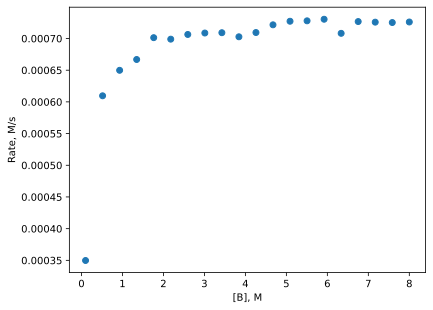

In [24]:
plt.plot(conc, rate, 'o')
plt.xlabel('[B], M')
plt.ylabel('Rate, M/s');

现在我们已经拥有数据，我们可以将其拟合到理论方程以提取速率常数。

In [25]:
const, __ = optimize.curve_fit(frate, conc, rate, bounds=(0, 5))
const

array([1.22558323, 0.50705095, 4.49294907])

这些速率常数与用于生成数据的速率常数非常吻合。我们还可以在下面绘制模拟数据与通过曲线拟合生成的速率方程。

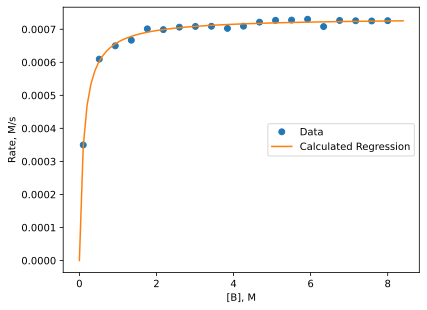

In [26]:
plt.plot(conc, rate, 'o', label='Data')

x = np.arange(0, 8.5, 0.1)
plt.plot(x, frate(x, const[0], const[1], const[2]), 
         '-', label='Calculated Regression')

plt.xlabel('[B], M')
plt.ylabel('Rate, M/s')
plt.legend(loc=7);

```{note}
如果您正在优化具有多个参数的函数，则边界格式为两个列表或元组。第一个包含下界，第二个包含上界，如下所示。
~~~python
bounds = ((a_low, b_low, c_low), (a_high, b_high, c_high))
optimize.curve_fit(func, xdata, ydata, bounds=bounds)
~~~
```

`optimize.curve_fit()`函数的另一个特点是它还接受每个数据点的不确定性或误差。到目前为止，本书中看到的所有回归示例都假设每个数据点具有相同的不确定性水平，但数据具有不同不确定性并不少见。如果您的不确定性有变化，您可以将`curve_fit()`函数的不确定性作为标准偏差提供给`sigma=`参数作为类似数组的对象（例如，列表、集合或NumPy数组）。当提供了不确定性时，不确定性较大的数据点对结果回归的影响小于不确定性较小的数据点。有关更多信息和选项，请参阅[`scipy.optimize.curve_fit()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit)文档。

在下面的示例中，我们将再次拟合来自上述两步化学反应的浓度与动力学速率数据。这次，我们还有一个数组`uncertainty`，它提供了速率的不确定性程度。

In [27]:
uncertainty = [0.10e-6, 0.12e-6, 0.15e-6, 0.18e-6, 2.0e-6, 
               2.1e-6, 2.3e-6, 2.6e-6, 2.9e-6, 3.0e-6,
               3.0e-6, 3.1e-6, 2.9e-6, 3.5e-6, 3.9e-6,
               4.0e-6, 4.1e-6, 4.4e-6, 5.7e-6, 5.3e-6] # M/s

const, __ = optimize.curve_fit(frate, conc, rate, 
                               sigma = uncertainty, bounds=(0, 5))
const

array([1.21309944, 0.48085692, 4.48897566])

将这些常数与假设误差不变时计算出的常数进行比较，值相似但有明显的差异。一般规律是，不确定性的*变化*越大，这些常数与假设误差不变时得到的常数之间的差异就越大。

```{note}
将数据拟合到数学函数还可以使用`optimize.least_squares()`函数来完成。使用`curve_fit()`和`least_squares()`之间的关键区别在于，前者直接接受理论方程和数据，而后者需要一个计算[残差](14.2)的Python函数。有趣的是，`curve_fit()`函数的源代码调用了`least_squares()`函数。在这里我们使用`curve_fit()`函数，因为它更直观且方便。

还有另一个相关函数`optimize.leastsq()`，它执行类似的操作，但只使用Levenberg-Marquardt算法，并在scipy.org网站上被描述为遗留代码。`optimize.least_squares()`函数更加灵活，可能是这两者中更好的选择。
```

### 14.2.3 混合分析物示例

下面是一个额外的示例，我们使用优化来确定三种不同染料混合在一起并通过UV-Vis光谱法进行分析的浓度。这个示例受到了*Journal of Chemical Education*上Jesse Maccione、Joseph Welch和Emily C. Heider发表的一篇文章的启发。根据比尔定律，分析物的吸光度（A）是该分析物的摩尔吸光系数（$\epsilon$）、厘米中的路径长度（$b$）和浓度（$C$）的乘积。

$$ A = \epsilon bC $$

如果溶液中有多个分析物，则总吸光度（$A_{tot}$）等于各个分析物的吸光度之和。在我们的示例中，我们将处理红色、蓝色和黄色染料的混合物。

$$ A_{tot} = A_{red} + A_{blue} + A_{yellow} $$

我们最终需要染料的浓度，因此我们可以将比尔定律代入三种染料的吸光度。

$$  A_{tot} = \epsilon_{red} bC_{red} + \epsilon_{blue} bC_{blue} + \epsilon_{yellow} bC_{yellow} $$

路径长度是一个取决于仪器的常数，摩尔吸光系数（$\epsilon$）是取决于分析物和测量吸光度的波长的常数。这意味着对于特定的染料和仪器组合，总吸光度（$A_{tot}$）取决于各个染料的未知浓度。因为我们有三个未知数，所以我们需要三个方程来求解未知数。这可以通过在至少三个不同的波长处测量吸光度和摩尔吸光度来实现，如[第8.3.2节](8.3.2)中所示。在本章中，我们将在400 nm至850 nm之间的*每个*纳米处测量吸光度，并让优化函数通过调整各染料浓度来拟合总吸光度。

```{warning}
虽然从光谱中包含更多的数据点通常会导致更好的结果，但有时使用太多点会由于过度拟合噪声而产生相反的效果。最好选择信噪比最大的区域，以避免拟合过多的噪声。
```

首先，我们将使用pandas从`food_coloring.csv`文件中导入吸光度数据，并对其进行绘图以查看数据的样子。在CSV文件中，有纯红色、纯蓝色、纯黄色和三者混合物的UV-Vis光谱。


In [ ]:
!wget https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/SciCompforChemists/notebooks/chapter_14/data/food_coloring.csv

In [28]:
data = pd.read_csv('food_coloring.csv')
data.index = data['nm']
data.drop('nm', axis=1, inplace=True)

A_red = data['red_40']
A_yellow = data['yellow_6']
A_blue = data['blue_1']
A_mix = data['mix_1']

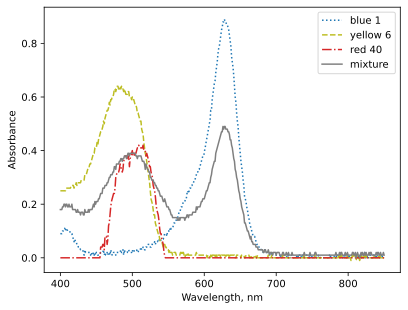

In [29]:
plt.plot(data.index, A_blue, c='C0', linestyle=':')
plt.plot(data.index, A_yellow, c='C8', linestyle='--')
plt.plot(data.index, A_red, c='C3', linestyle='-.')
plt.plot(data.index, A_mix, c='C7')
plt.xlabel('Wavelength, nm')
plt.ylabel('Absorbance')
plt.legend(['blue 1', 'yellow 6', 'red 40', 'mixture']);

接下来，我们将使用每个纯染料样品的吸光度来根据比尔定律找到摩尔吸光率。在这个仪器中，路径长度 $b$ 为1厘米，浓度以摩尔来表示。

In [30]:
eps_red = A_red / 4.09e-5
eps_blue = A_blue / 5.00e-6
eps_yellow = A_yellow / 2.92e-5

最后，我们将编写一个Python函数，用于计算由单个浓度和摩尔吸光率得到的总吸光度，然后将该函数提供给 `optimize.curve_fit()` 函数。拟合参数是各个染料的计算浓度。

In [31]:
def absorb(spec, C_red, C_blue, C_yellow):
    return eps_red * C_red + eps_blue * C_blue + eps_yellow * C_yellow

fit, __ = optimize.curve_fit(absorb, data.index, A_mix)
fit

array([1.44922872e-05, 2.84592011e-06, 1.26645032e-05])

最终结果是红色、蓝色和黄色染料的浓度分别为$1.45×10^{-5}$ M，$2.85×10^{-6}$ M和$1.27×10^{-5}$ M。

下面是一个简短的演示，说明如何使用`optimize.lease_squares()`函数解决这个问题。如前所述，`curve_fit()`和`least_squares()`函数都可以用来解决相同的问题。`least_squares()`函数需要一个Python函数来计算残差（即，计算出的吸光度与测量吸光度之间的差值），而不是理论方程。这个函数还需要拟合参数的初始猜测值。即使你不知道浓度，也可以给出一些合理的值。在这种情况下，我们猜测每种染料的浓度为$1×10^{-3}$ M。

In [32]:
def residuals(X):
    C_red, C_blue, C_yellow = X
    A_calc = C_red * eps_red + C_blue * eps_blue + C_yellow * eps_yellow
    return A_mix - A_calc

lstsq = optimize.least_squares(residuals, (1e-3, 1e-3, 1e-3))
lstsq.x

array([1.44922873e-05, 2.84592011e-06, 1.26645031e-05])

三种染料的浓度结果与`curve_fit()`函数计算出的浓度相同（或几乎相同）。

```
以上方法假设每种染料的贡献是纯粹可加的，因此每种染料对总吸光度的贡献仅取决于它自己的浓度。这意味着，例如，假设溶液中不同染料之间的相互作用可以忽略不计。
```

## 14.3 寻找根

寻找根是确定函数何时等于零的过程，$f(a,b,...) = 0$。由于任何方程都可以重新排列成等于零，这是解方程的一种通用方法。如果函数是单变量的，$f(a)=0$，即使没有优化算法，这个任务有时看起来也很简单，但随着方程的复杂性或变量数量的增加，使用优化算法可能会有益。

与上面的最小化函数类似，寻找根的函数有两个相关版本：`scipy.optimize.root()`和`scipy.optimize.root_scalar()`。关键区别在于`root()`函数可以求解单变量和多变量函数，而`root_scalar()`函数只能求解单变量函数。两个函数都需要一个函数`func`来找到根，`root()`函数还需要一个初始猜测值`x0`。`root_scalar()`函数还允许用户提供一个可选的根范围值`bracket=(start, stop)`。

~~~python
scipy.optimize.root(func, x0)
scipy.optimize.root_scalar(func, bracket=(start, stop))
~~~

作为寻找根的例子，我们可以找到氢原子3s轨道径向波函数中的节点。因为只有一个变量，$r$，我们可以使用`scipy.optimize.root_scalar()`函数。下面，我们首先将径向波函数定义为一个Python函数，`orbital_3s`。

In [33]:
def orbital_3s(r):
    wf = (2/27)*np.sqrt(3)*(2*r**2/9 - 2*r + 3)* np.exp(-r/3)
    return wf

在我们找到根之前，让我们先可视化这个函数，看看我们面对的是什么。水平的虚线*y* = 0作为一个视觉指南。根位于波函数的实线与虚线相交的地方。

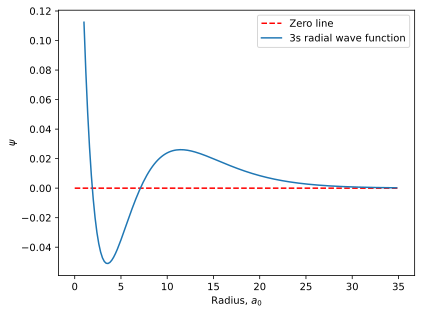

In [34]:
r = np.arange(1, 35, 0.2)
psi_3s = [orbital_3s(num) for num in r]

plt.hlines(0, 0, 35, 'r', linestyles='--', label='Zero line')
plt.plot(r, psi_3s, '-', label='3s radial wave function')
plt.legend()
plt.xlabel('Radius, $a_0$')
plt.ylabel('$\psi$');

这个函数有两个节点，所以我们的`bracket=`值将决定我们最终要求解的是哪一个。

In [35]:
node1 = optimize.root_scalar(orbital_3s, bracket=[0, 3])
node1

      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 1.901923788646684

In [36]:
node2 = optimize.root_scalar(orbital_3s, bracket=[5, 10])
node2

      converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 7.098076211353316

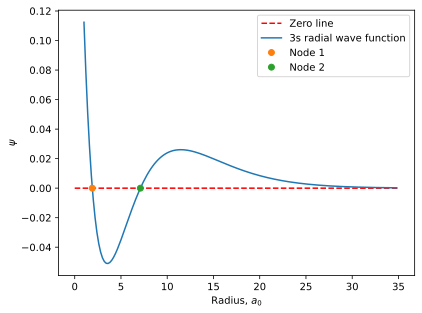

In [37]:
r = np.arange(1, 35, 0.2)
psi_3s = [orbital_3s(num) for num in r]

plt.hlines(0, 0, 35, 'r', linestyles='--', label='Zero line')
plt.plot(r, psi_3s, '-', label='3s radial wave function')
plt.plot(node1.root, orbital_3s(node1.root), 'o', label='Node 1')
plt.plot(node2.root, orbital_3s(node2.root), 'o', label='Node 2')
plt.xlabel('Radius, $a_0$')
plt.ylabel('$\psi$')
plt.legend();

上面的两个点显示了这个函数的两个根的位置，它们显然位于波函数的节点上。

## 更多阅读

1. `scipy.optimize`模块用户指南。https://docs.scipy.org/doc/scipy/tutorial/optimize.html (免费资源)
2. Watt, J.; Borhani, R.; Katsaggelos, A. K. 《机器学习精炼：基础、算法和应用》；第2版；剑桥大学出版社，2020年，第21-124页。这些章节是优化算法的很好的介绍。

## 参考
[https://github.com/weisscharlesj/SciCompforChemists](https://github.com/weisscharlesj/SciCompforChemists)

## 练习

1. 一个温暖或热的物体会发射一定范围内的辐射，这些辐射的波长由下面的普朗克定律描述，其中B是辐射度，$\lambda$是辐射频率，$c$是光速，$h$是普朗克常数，$k$是玻尔兹曼常数，$T$是物体的温度（单位：K）。

    $$ B(\lambda) = \frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda kT}}-1} $$ 

    使用最小化函数确定一个温度为5000 K的物体的最大辐射度波长。提示：确保在你定义的Python函数中加入一个额外的负号，并且你可能需要使用边界或括号来防止最小化函数尝试零值并产生`ZeroDivisionError`。


2. 在铝氯化物催化的弗里德尔-克拉夫斯条件下，甲苯乙烷的三种异构体（即*邻*（ortho）、*间*（meta）和*对*（para）异构体）可相互转化。Allen, R. H. et al. 对这种异构体平衡的研究实验确定了这些异构体间转化的速率常数。使用速率常数数据，计算得到以下平衡常数：*K*$_{om}$=7.2，*K*$_{pm}$=2.47，*K*$_{op}$=2.9，其中每个平衡常数的定义如下。

    $$ K_{om}=\frac{[meta]}{[ortho]}, \quad K_{pm}=\frac{[meta]}{[para]}, \quad K_{op}={\frac{[para]}{[ortho]}}  $$

    使用这些信息，计算平衡时每个异构体的百分比。将你的百分比与上面论文中提供的百分比（在摘要中）进行比较。

3. 在一个密封的活塞中，包含0.32摩尔的氦气，温度为298 K。通过使用`optimize.curve_fit()`函数和理想气体定律对以下数据进行非线性拟合，确定$R$的值。

    $$ P = \frac{nRT}{V} $$

    | 体积 (L) | 压力 (atm) |
    |:----------:|:--------------:|
    | 0.401       | 21.8           |  
    | 0.701       | 11.3           |
    | 1.22        | 5.17           |
    | 1.80        | 5.49           |
    | 2.39        | 3.86           |
    | 2.83        | 4.34           |
    | 3.09        | 2.72           |

4. 下面是一个化学反应A $\rightarrow$ P的理论动力学速率定律，该反应由0.001 M的金属催化剂C催化。表格中包含了速率、A的浓度和速率的不确定性的动力学数据。使用`optimize.curve_fit()`函数来确定$k_1$和$K_{eq}$的值。用您确定的常数绘制下面的数据，并叠加计算出的值，以显示它们是合理的值。

    $$ Rate = \frac{k_1K_{eq}[A][C]}{1 + K_{eq}[A]} $$

    | 速率, M/s | [A], M | 速率不确定性, M/s |
    |:---------:|:------:|:---------------------:|
    | 2.18e-06  | 0.01   |  0.11e-6  |
    | 1.72e-05  | 0.71   |  0.12e-6  |
    | 2.75e-05  | 1.43   |  0.25e-6  |
    | 4.36e-05  | 2.14   |  0.40e-6  |
    | 5.23e-05  | 2.86   |  0.50e-6  |
    | 5.23e-05  | 3.57   |  1.0e-6   |
    | 6.71e-05  | 4.29   |  1.5e-6   |
    | 6.26e-05  | 5.00   |  1.8e-6   |

5. 一种解决酸碱平衡浓度的方法是通过多项式，正如F. Bamdad所示。下面是一个三次多项式，它来源于将氢氰酸（HCN）放入水中的平衡，其中$x$是水合氢离子的浓度，*K*$_a$是酸平衡常数，*K*$_w$是水自离解的平衡常数，[HCN]$_0$是氢氰酸的初始浓度。假设[HCN]$_0$ = 6.8 $\times$ $10^{-6}$ M 和 $K_a$ = 6.2 $\times$ $10^{-10}$，使用`scipy.optimize`模块中的根查找算法求解水合氢离子的浓度。

    $$ x^3 + K_a x^2 + (K_w + [HCN]_0K_a)x - K_wK_a = 0 $$

6. 范德华方程是理想气体定律的一种修正形式，但包括了两个修正因子，这些修正因子考虑了分子间力和气体分子的体积。这些修正因子包括常数$a$和$b$，它们依赖于气体，$a$和$b$的值可以通过将范德华方程拟合到压力和体积数据来计算。

    $$ \left(P + a\frac{n^2}{V^2} \right) (V - nb) = nRT $$ 

    加载文件[`PV_CO.csv`](https://bohrium-example.oss-cn-zhangjiakou.aliyuncs.com/notebook/SciCompforChemists/notebooks/chapter_14/data/PV_CO.csv)，其中包含从NIST Chemistry WebBook获取的298 K下一摩尔一氧化碳的压力和体积数据。将范德华方程拟合到这个数据集，以确定一氧化碳的$a$和$b$值。